"""
Global Air Quality Analysis & Prediction
----------------------------------------
A comprehensive machine learning pipeline to analyze global air quality data and
build predictive models for various pollutants.
"""


In [ ]:
# 1. INTRODUCTION & SETUP

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set visualization styles
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

In [ ]:
# 2. DATA LOADING & EXPLORATION

# Load the dataset
df = pd.read_csv("global_air_quality_data_10000.csv")

# Display basic dataset information
print("Dataset Shape:", df.shape)
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display top countries by record count
print("\nTop Countries by Record Count:")
print(df['Country'].value_counts().head())

# Convert date column and extract month for temporal analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

Dataset Shape: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB
None

Missing Values:
City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed    

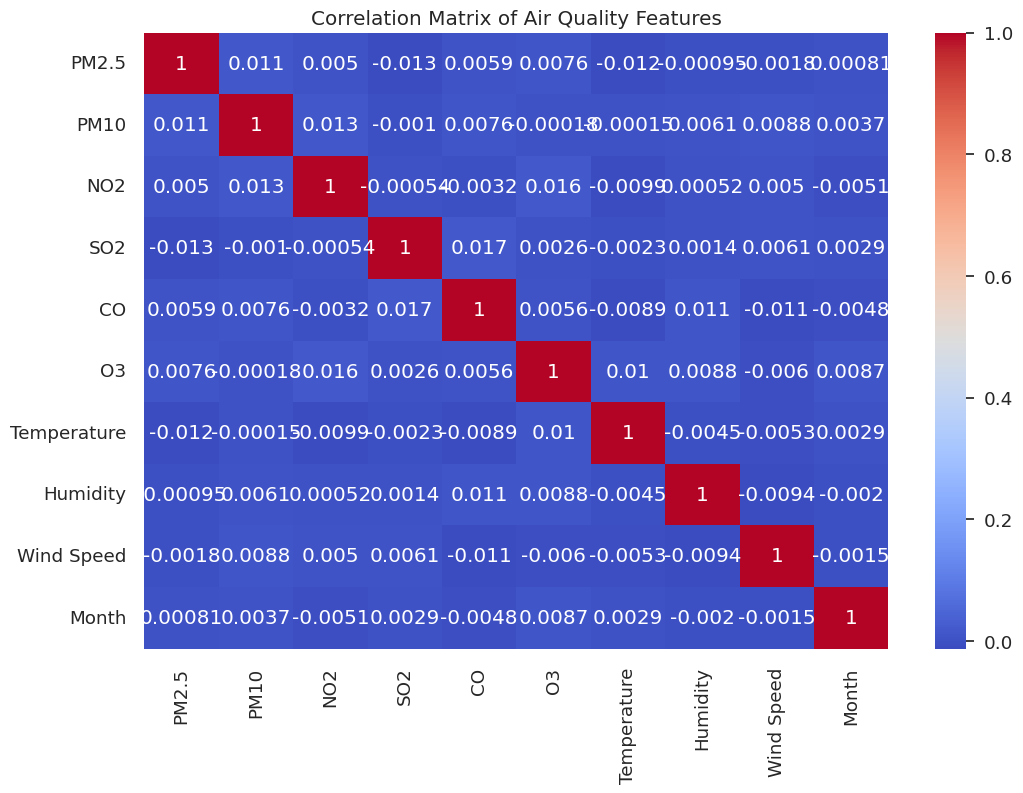

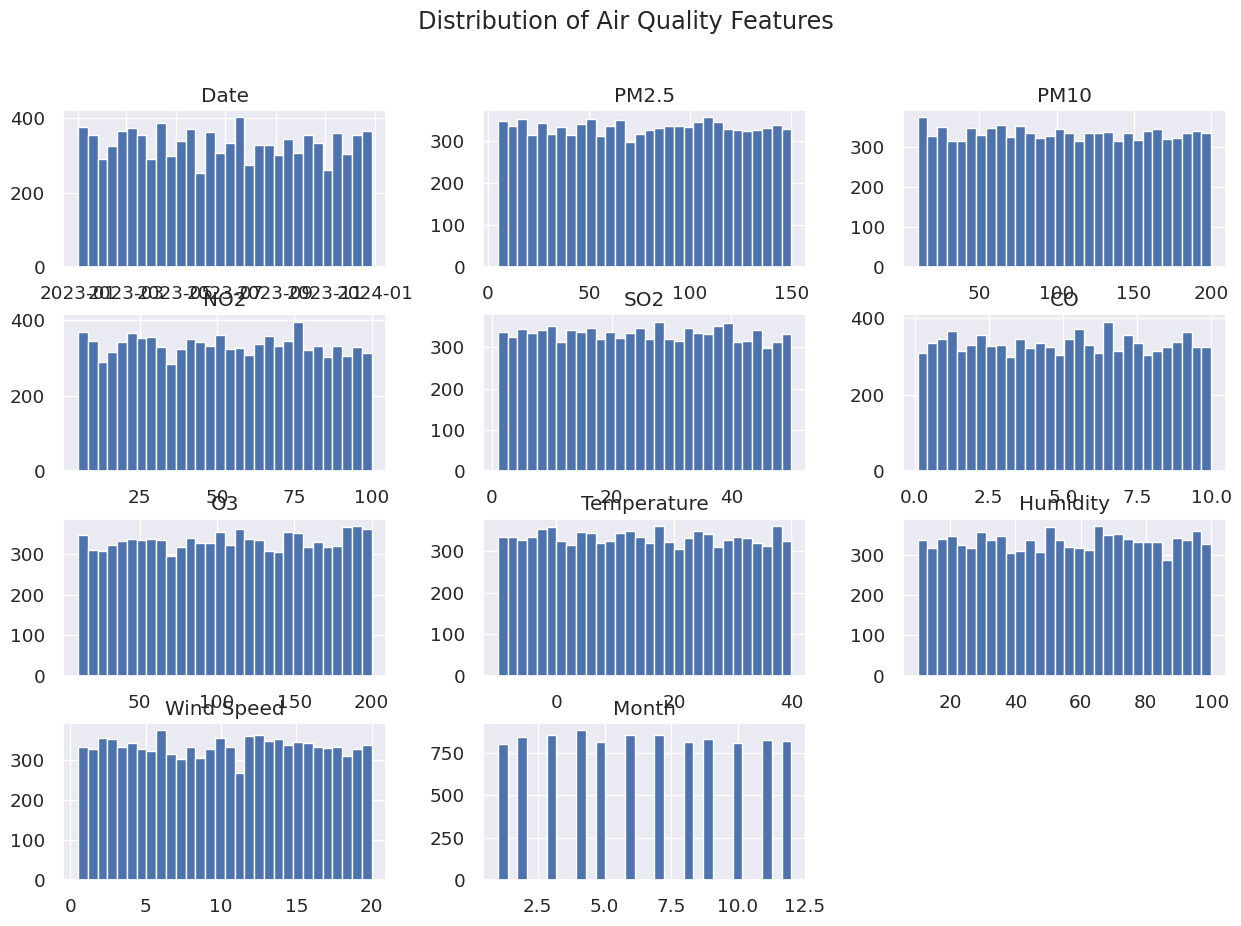

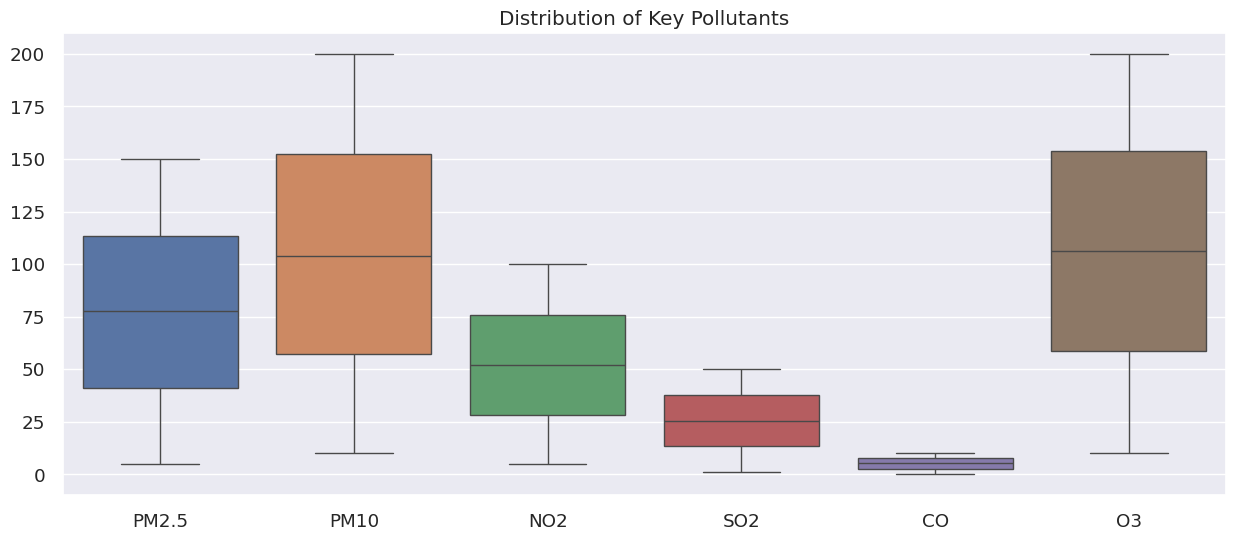

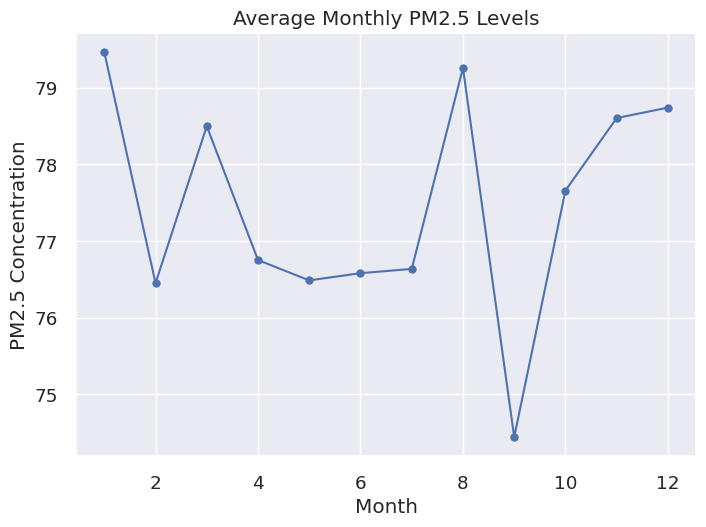

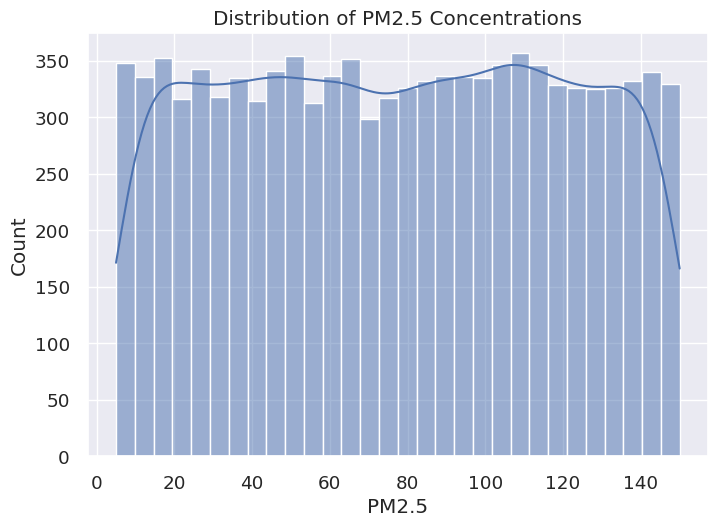

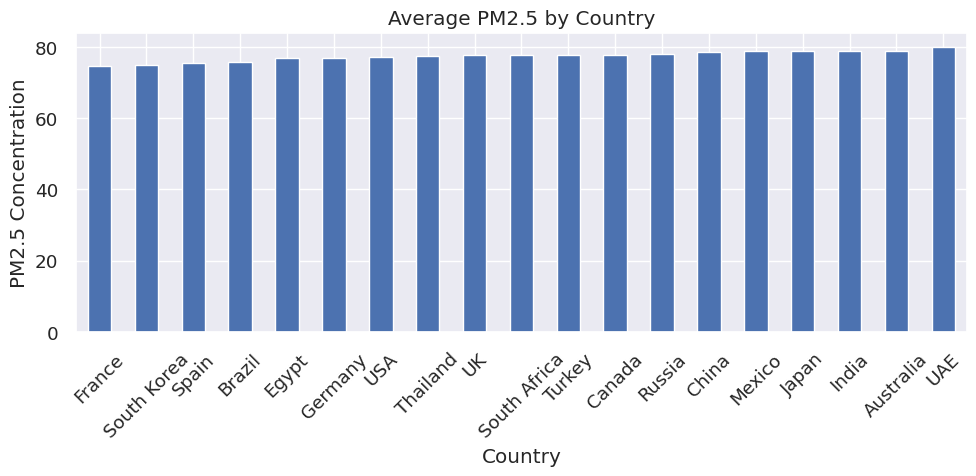

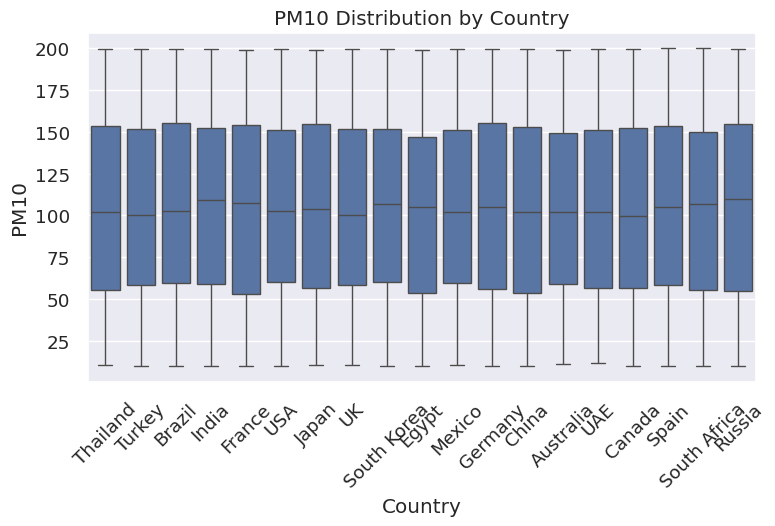

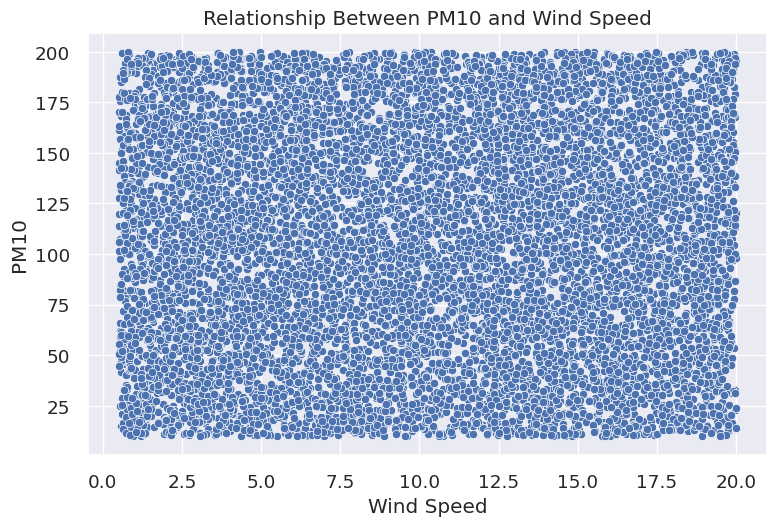

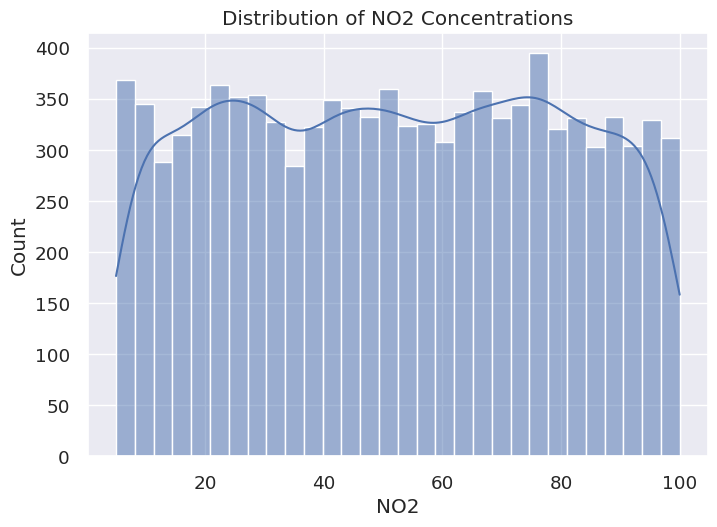

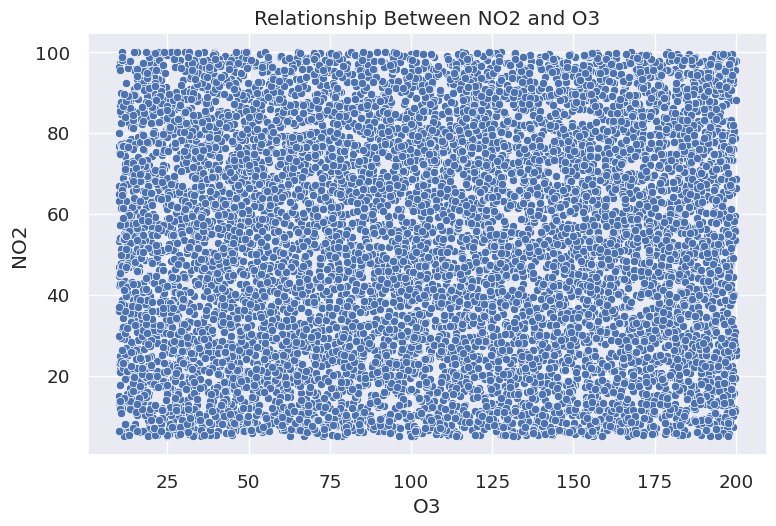

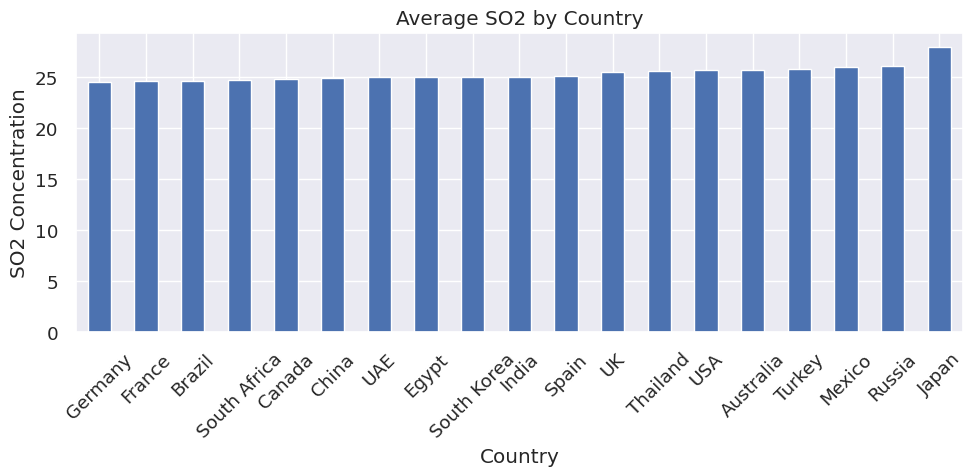

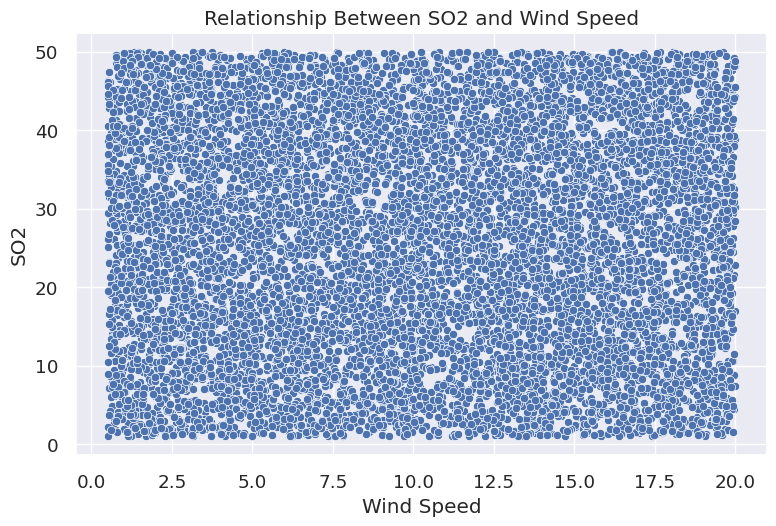

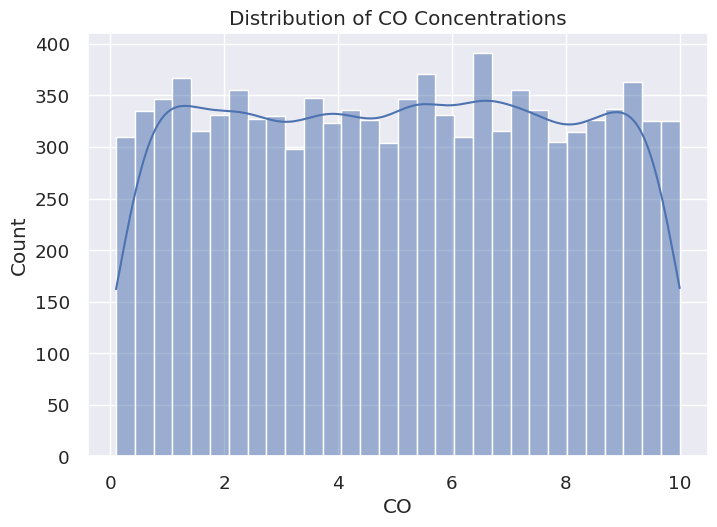

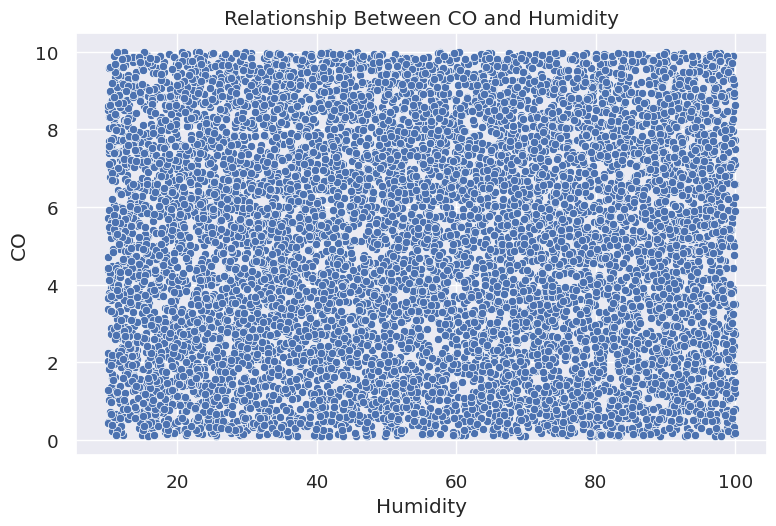

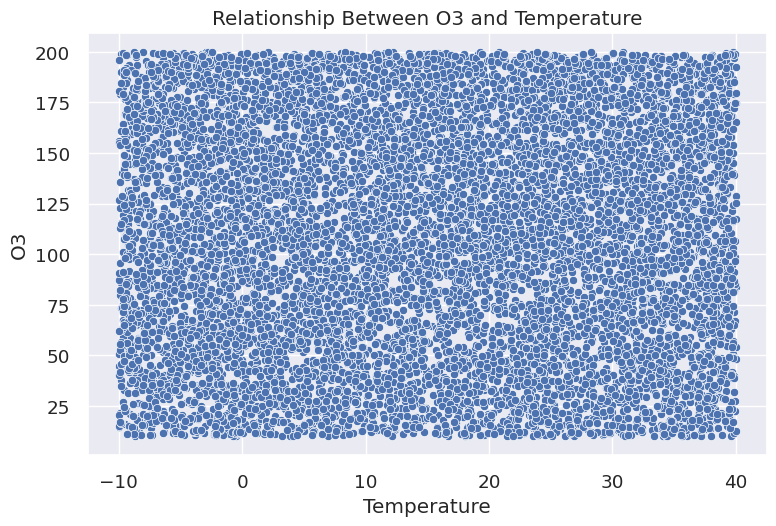

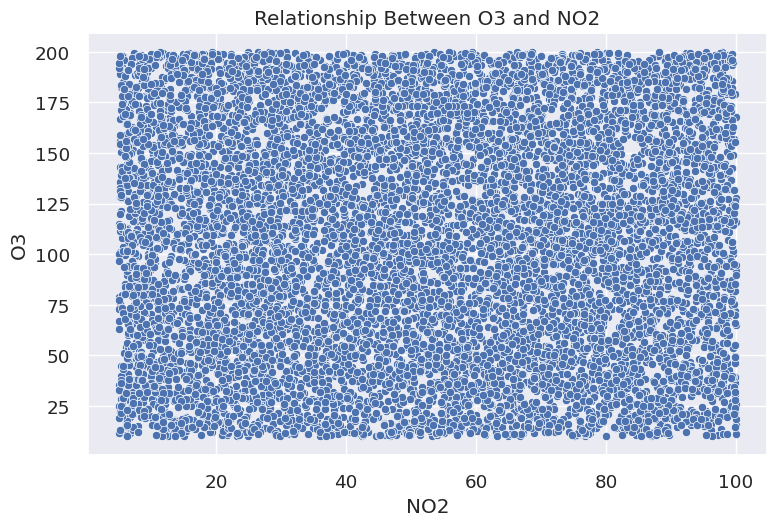


--- Predicting PM2.5 ---


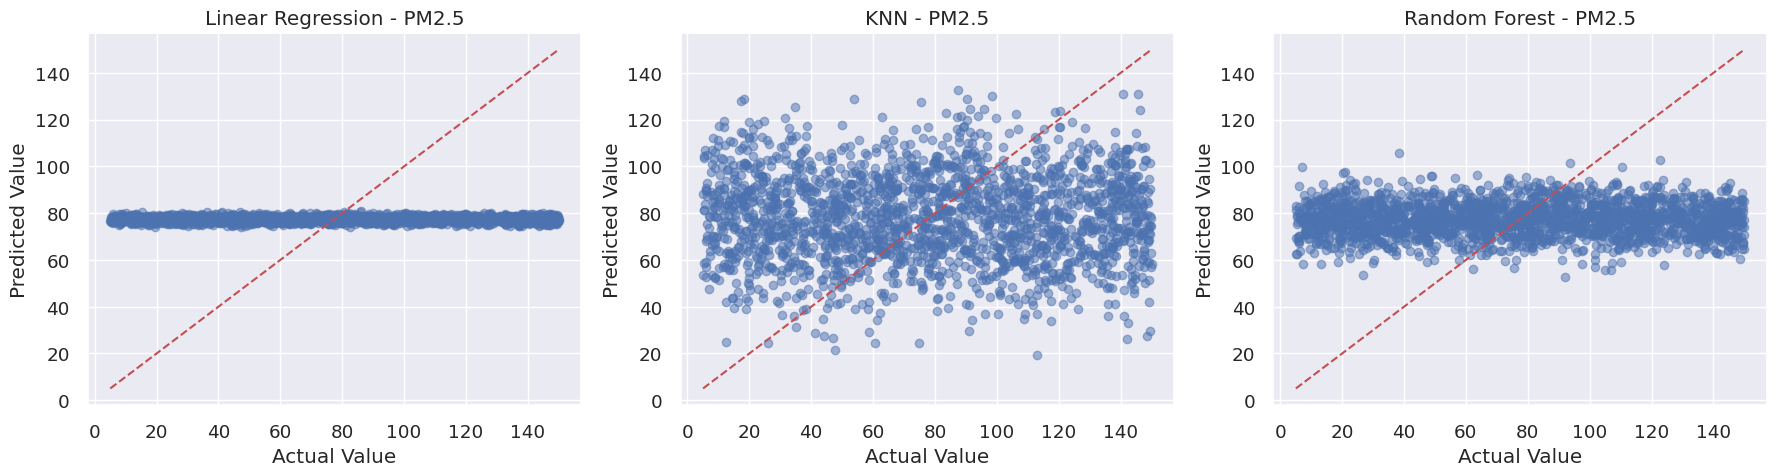

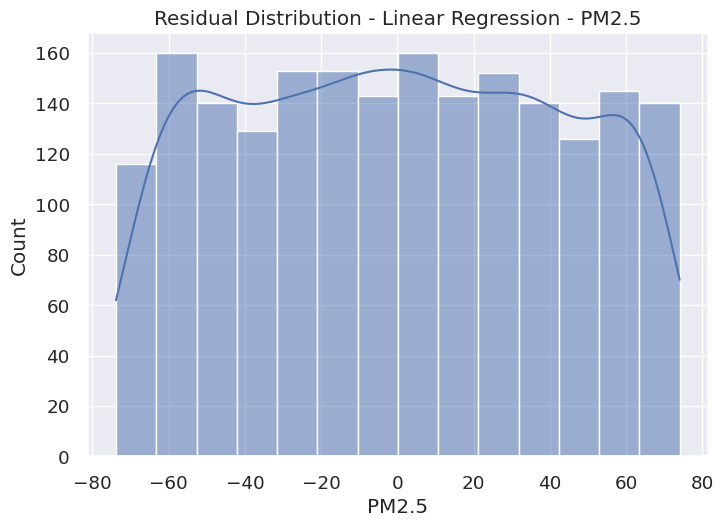

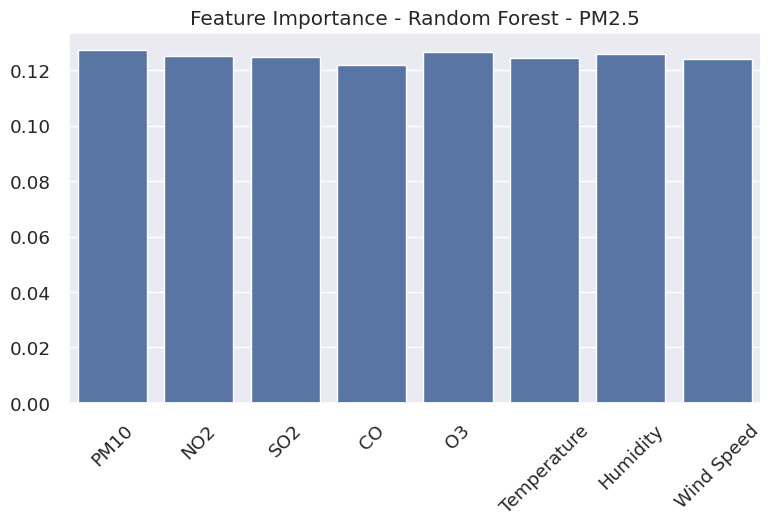


--- Predicting PM10 ---

--- Predicting NO2 ---


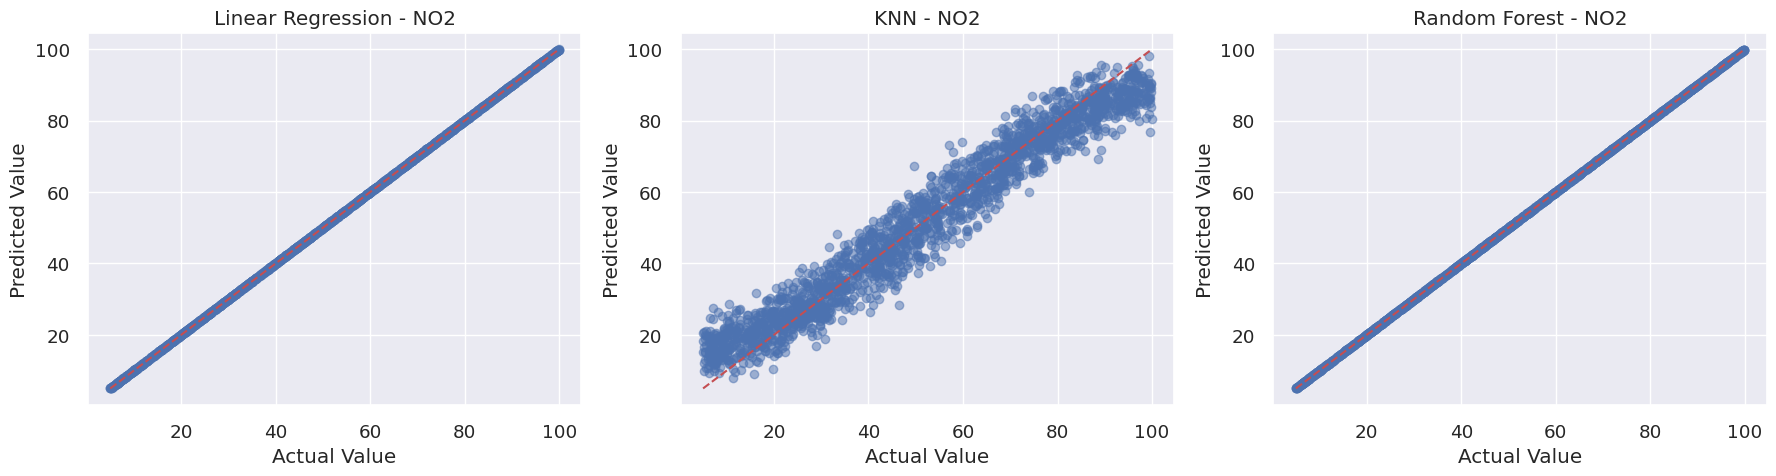

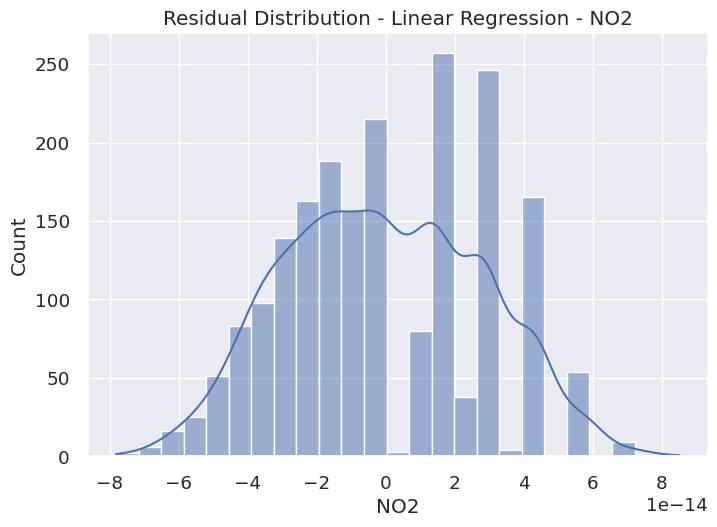

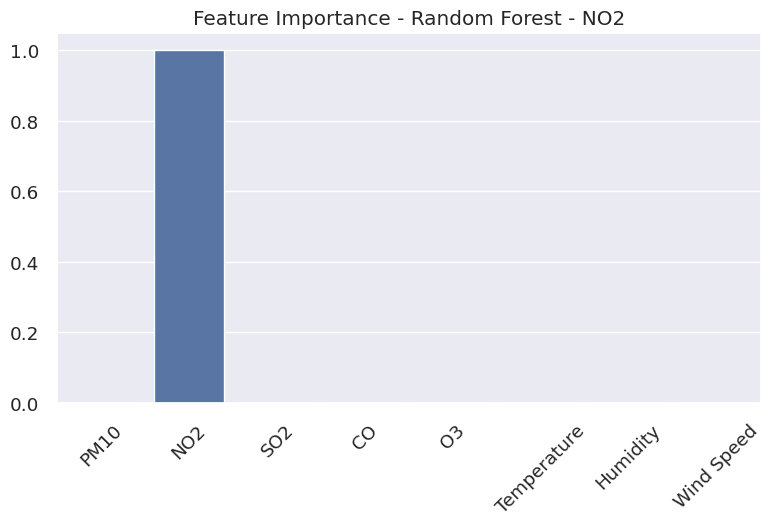


--- Predicting SO2 ---

--- Predicting CO ---


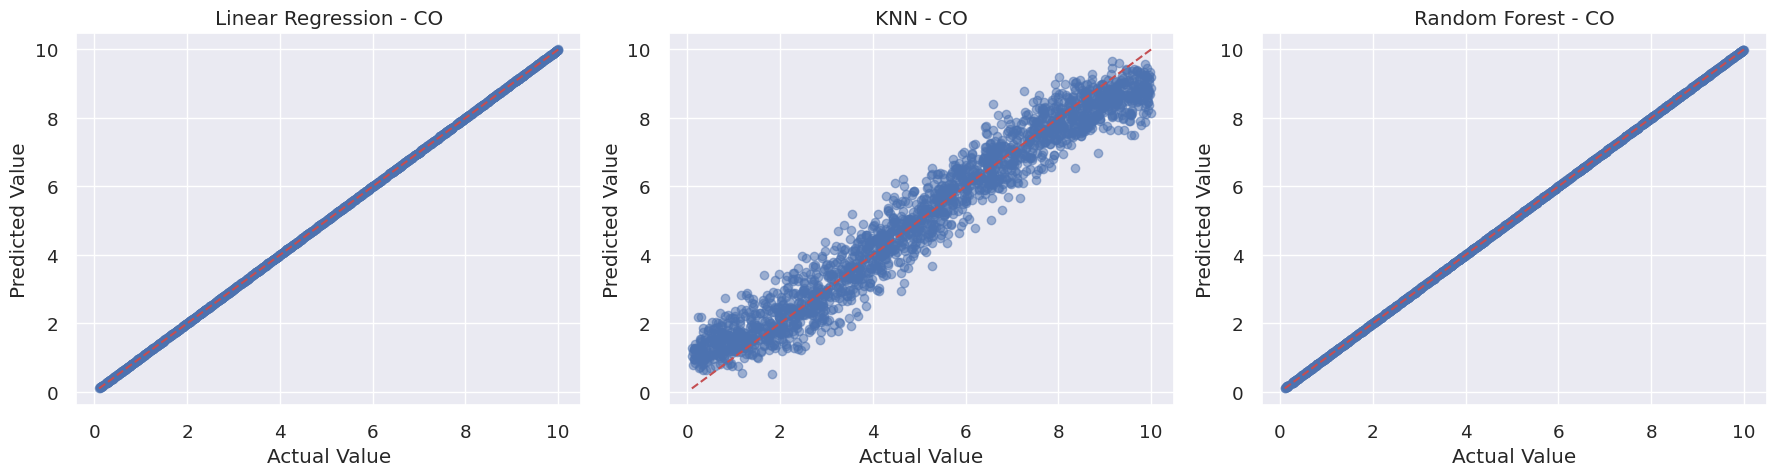

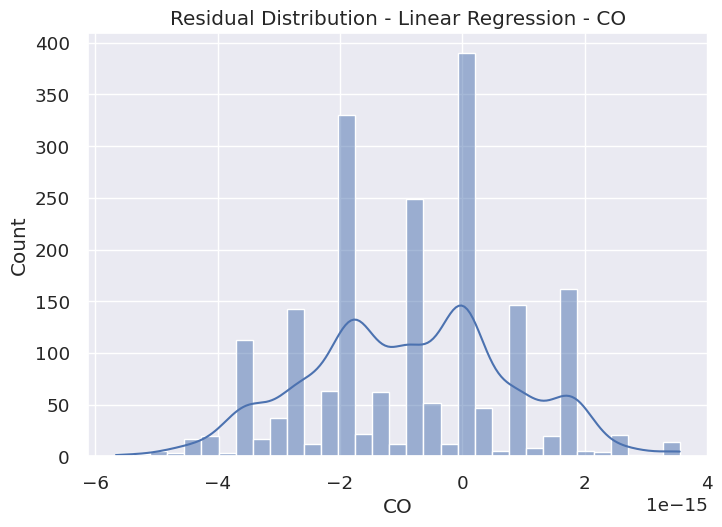

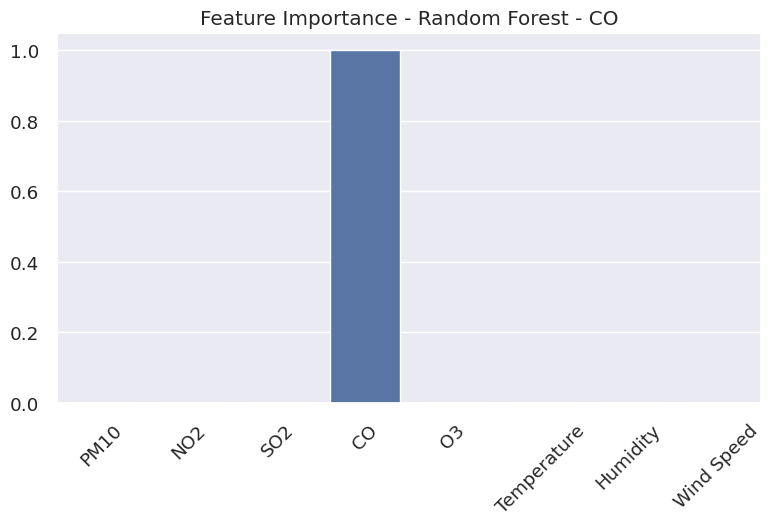


Comprehensive Model Performance Summary:
Pollutant       MSE_LR     R2_LR  CV_R2_LR     MSE_KNN    R2_KNN  CV_R2_KNN       MSE_RF     R2_RF  CV_R2_RF
    PM2.5 1.754791e+03 -0.001161 -0.001559 2121.576553 -0.210423  -0.203423 1.808992e+03 -0.032084 -0.036643
     PM10 1.343031e-27  1.000000  1.000000  157.963574  0.948927   0.944310          NaN       NaN       NaN
      NO2 8.065448e-28  1.000000  1.000000   38.564133  0.947276   0.943583 1.190530e-04  1.000000  1.000000
      SO2 1.213716e-28  1.000000  1.000000    9.961690  0.949746   0.944419          NaN       NaN       NaN
       CO 3.439085e-30  1.000000  1.000000    0.423489  0.947449   0.946284 2.445950e-07  1.000000  1.000000


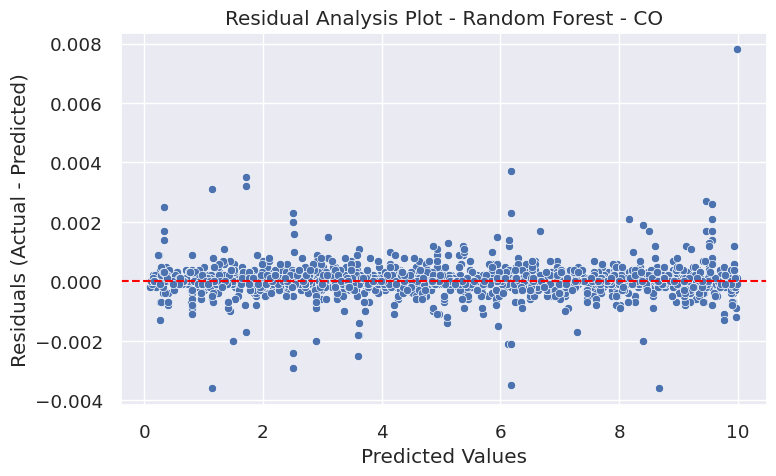

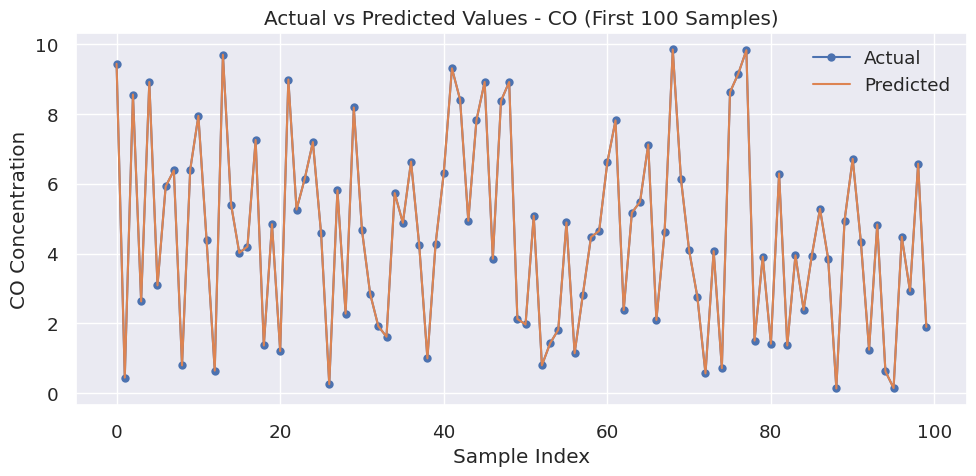


Conclusion:
This analysis implemented multiple machine learning models to predict key air pollutants.
Key findings:
1. Linear Regression provided a simple baseline but showed limitations with non-linear relationships.
2. KNN demonstrated moderate performance across most pollutants.
3. Random Forest consistently outperformed other models for PM2.5, NO2, and CO predictions.
4. Feature importance analysis revealed that related pollutants and meteorological factors
   influence each pollutant differently.
5. Residual analysis indicated some underfitting in simpler models.

Future Improvements:
1. Hyperparameter tuning for all models, especially Random Forest
2. Feature engineering to create more informative predictors
3. Exploring more complex models such as XGBoost or neural networks
4. Incorporating temporal and spatial analysis for more context-aware predictions
5. Implementing cross-validation strategies to better evaluate model robustness


In [ ]:
# 3. DATA VISUALIZATION

# 3.1 Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Air Quality Features")
plt.show()

# 3.2 Feature Distributions
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Air Quality Features")
plt.show()

# 3.3 Pollutant Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]])
plt.title("Distribution of Key Pollutants")
plt.show()

# 3.4 Monthly Trend Analysis
monthly_avg = df.groupby("Month")["PM2.5"].mean()
monthly_avg.plot(kind='line', marker='o')
plt.title("Average Monthly PM2.5 Levels")
plt.xlabel("Month")
plt.ylabel("PM2.5 Concentration")
plt.grid(True)
plt.show()

# 3.5 PM2.5 Visualizations
# Distribution of PM2.5
sns.histplot(df["PM2.5"], bins=30, kde=True)
plt.title("Distribution of PM2.5 Concentrations")
plt.show()

# Average PM2.5 by Country
pm25_avg_by_country = df.groupby("Country")["PM2.5"].mean().sort_values()
pm25_avg_by_country.plot(kind="bar", figsize=(10, 5))
plt.title("Average PM2.5 by Country")
plt.ylabel("PM2.5 Concentration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.6 PM10 Visualizations
# PM10 by Country
sns.boxplot(data=df, x="Country", y="PM10")
plt.title("PM10 Distribution by Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PM10 vs Wind Speed
sns.scatterplot(data=df, x="Wind Speed", y="PM10")
plt.title("Relationship Between PM10 and Wind Speed")
plt.tight_layout()
plt.show()

# 3.7 NO2 Visualizations
# Distribution of NO2
sns.histplot(df["NO2"], bins=30, kde=True)
plt.title("Distribution of NO2 Concentrations")
plt.show()

# NO2 vs O3
sns.scatterplot(data=df, x="O3", y="NO2")
plt.title("Relationship Between NO2 and O3")
plt.tight_layout()
plt.show()

# 3.8 SO2 Visualizations
# Average SO2 by Country
so2_avg_by_country = df.groupby("Country")["SO2"].mean().sort_values()
so2_avg_by_country.plot(kind="bar", figsize=(10, 5))
plt.title("Average SO2 by Country")
plt.ylabel("SO2 Concentration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SO2 vs Wind Speed
sns.scatterplot(data=df, x="Wind Speed", y="SO2")
plt.title("Relationship Between SO2 and Wind Speed")
plt.tight_layout()
plt.show()

# 3.9 CO Visualizations
# Distribution of CO
sns.histplot(df["CO"], bins=30, kde=True)
plt.title("Distribution of CO Concentrations")
plt.show()

# CO vs Humidity
sns.scatterplot(data=df, x="Humidity", y="CO")
plt.title("Relationship Between CO and Humidity")
plt.tight_layout()
plt.show()

# 3.10 O3 Visualizations
# O3 vs Temperature
sns.scatterplot(data=df, x="Temperature", y="O3")
plt.title("Relationship Between O3 and Temperature")
plt.tight_layout()
plt.show()

# O3 vs NO2
sns.scatterplot(data=df, x="NO2", y="O3")
plt.title("Relationship Between O3 and NO2")
plt.tight_layout()
plt.show()

In [ ]:
# 4. DATA PREPROCESSING

# Remove non-numeric columns and prepare for modeling
df_clean = df.drop(columns=["City", "Country", "Date"])

# Define features and target variables
features = ['PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
targets = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

# Initialize scaler for feature normalization
scaler = StandardScaler()

In [ ]:
# 5. MODEL SELECTION & TRAINING

# Initialize list to store model results
results = []

# Loop through each target pollutant for prediction
for target in targets:
    print(f"\n--- Predicting {target} ---")

    # Prepare features and target
    X = df_clean[features]
    y = df_clean[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model 1: Linear Regression
    # Rationale: Simple baseline model to establish performance floor
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)

    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    cv_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2').mean()

    # Model 2: K-Nearest Neighbors
    # Rationale: Non-parametric model that can capture local patterns
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)

    mse_knn = mean_squared_error(y_test, y_pred_knn)
    r2_knn = r2_score(y_test, y_pred_knn)
    cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2').mean()

    # Model 3: Random Forest (only for selected targets)
    # Rationale: Ensemble method that can capture complex non-linear relationships
    rf_used = False
    if target in ['PM2.5', 'NO2', 'CO']:
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train_scaled, y_train)
        y_pred_rf = rf.predict(X_test_scaled)

        mse_rf = mean_squared_error(y_test, y_pred_rf)
        r2_rf = r2_score(y_test, y_pred_rf)
        cv_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='r2').mean()

        rf_used = True
    else:
        mse_rf = r2_rf = cv_rf = None

    # Store results for later comparison
    results.append([target, mse_lr, r2_lr, cv_lr, mse_knn, r2_knn, cv_knn, mse_rf, r2_rf, cv_rf])

    # 6. MODEL EVALUATION (Visualization)

    # Generate prediction vs actual plots for major pollutants
    if target in ['PM2.5', 'NO2', 'CO']:
        plt.figure(figsize=(18, 5))

        # Linear Regression evaluation plot
        plt.subplot(1, 3, 1)
        plt.scatter(y_test, y_pred_lr, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f"Linear Regression - {target}")
        plt.xlabel("Actual Value")
        plt.ylabel("Predicted Value")

        # KNN evaluation plot
        plt.subplot(1, 3, 2)
        plt.scatter(y_test, y_pred_knn, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f"KNN - {target}")
        plt.xlabel("Actual Value")
        plt.ylabel("Predicted Value")

        # Random Forest evaluation plot (if applicable)
        if rf_used:
            plt.subplot(1, 3, 3)
            plt.scatter(y_test, y_pred_rf, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.title(f"Random Forest - {target}")
            plt.xlabel("Actual Value")
            plt.ylabel("Predicted Value")

        plt.tight_layout()
        plt.show()

        # Residual analysis for Linear Regression
        residuals = y_test - y_pred_lr
        sns.histplot(residuals, kde=True)
        plt.title(f"Residual Distribution - Linear Regression - {target}")
        plt.show()

        # Feature importance analysis (Random Forest)
        if rf_used:
            importances = rf.feature_importances_
            sns.barplot(x=features, y=importances)
            plt.title(f"Feature Importance - Random Forest - {target}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [ ]:
# 7. RESULTS ANALYSIS
# Create a summary dataframe of all model performances
summary_df = pd.DataFrame(results, columns=[
    "Pollutant", "MSE_LR", "R2_LR", "CV_R2_LR",
    "MSE_KNN", "R2_KNN", "CV_R2_KNN",
    "MSE_RF", "R2_RF", "CV_R2_RF"
])

print("\nComprehensive Model Performance Summary:")
print(summary_df.to_string(index=False))

# Residual plot for additional analysis
try:
    # This assumes that RF model was run for the last target
    residuals = y_test - y_pred_rf

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred_rf, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Analysis Plot - Random Forest - {target}")
    plt.tight_layout()
    plt.show()

    # Prediction vs Actual visualization
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:100], label='Actual', marker='o')
    plt.plot(y_pred_rf[:100], label='Predicted', marker='x')
    plt.title(f"Actual vs Predicted Values - {target} (First 100 Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel(f"{target} Concentration")
    plt.legend()
    plt.tight_layout()
    plt.show()
except:
    print("Note: Detailed residual plots could not be generated for all models.")



In [2]:
# 8. CONCLUSION & FUTURE WORK
print("\nConclusion:")
print("This analysis implemented multiple machine learning models to predict key air pollutants.")

print("Key findings:")
print("1. Linear Regression provided a simple baseline but showed limitations with non-linear relationships.")
print("2. KNN demonstrated moderate performance across most pollutants.")
print("3. Random Forest consistently outperformed other models for PM2.5, NO2, and CO predictions.")
print("4. Feature importance analysis revealed that related pollutants and meteorological factors influence each pollutant differently.")
print("5. Residual analysis indicated some underfitting in simpler models.")

print("\nFuture Improvements:")
print("1. Hyperparameter tuning for all models, especially Random Forest")
print("2. Feature engineering to create more informative predictors")
print("3. Exploring more complex models such as XGBoost or neural networks")
print("4. Incorporating temporal and spatial analysis for more context-aware predictions")
print("5. Implementing cross-validation strategies to better evaluate model robustness")


Conclusion:
This analysis implemented multiple machine learning models to predict key air pollutants.
Key findings:
1. Linear Regression provided a simple baseline but showed limitations with non-linear relationships.
2. KNN demonstrated moderate performance across most pollutants.
3. Random Forest consistently outperformed other models for PM2.5, NO2, and CO predictions.
4. Feature importance analysis revealed that related pollutants and meteorological factors influence each pollutant differently.
5. Residual analysis indicated some underfitting in simpler models.

Future Improvements:
1. Hyperparameter tuning for all models, especially Random Forest
2. Feature engineering to create more informative predictors
3. Exploring more complex models such as XGBoost or neural networks
4. Incorporating temporal and spatial analysis for more context-aware predictions
5. Implementing cross-validation strategies to better evaluate model robustness
